In [1]:
import pandas as pd

# Reading the data
df = pd.read_csv('/content/Loan approval prediction.csv')

# Check
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
# Checking the nature of variables & features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

Lets take a closure look to features we possess:

**id:** Unique identifier for each record (int64). It should be later removed.

**person_age:** Age of the person (int).

**person_income:** Income of the person (int).

**person_home_ownership:** Home ownership status (object, likely categorical).

**person_emp_length:** Length of employment in years (float).

**loan_intent:** Purpose of the loan (object, likely categorical).

**loan_grade:** Loan grade (object, categorical).

**loan_amnt:** Loan amount (int).

**loan_int_rate:** Loan interest rate (float).

**loan_percent_income:** Loan amount as a percentage of income (float).

**cb_person_default_on_file:** Credit bureau record indicating if default occurred (object, categorical).

**cb_person_cred_hist_length:** Credit history length in years (int).

**loan_status:** Target variable indicating loan approval status (int).


In [4]:
# Lets take a quick look at the data
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [5]:
# Now is the time to build some figures

# Exploratory Data Analysis

In [2]:
# Improt seaborn & Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Double check of missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


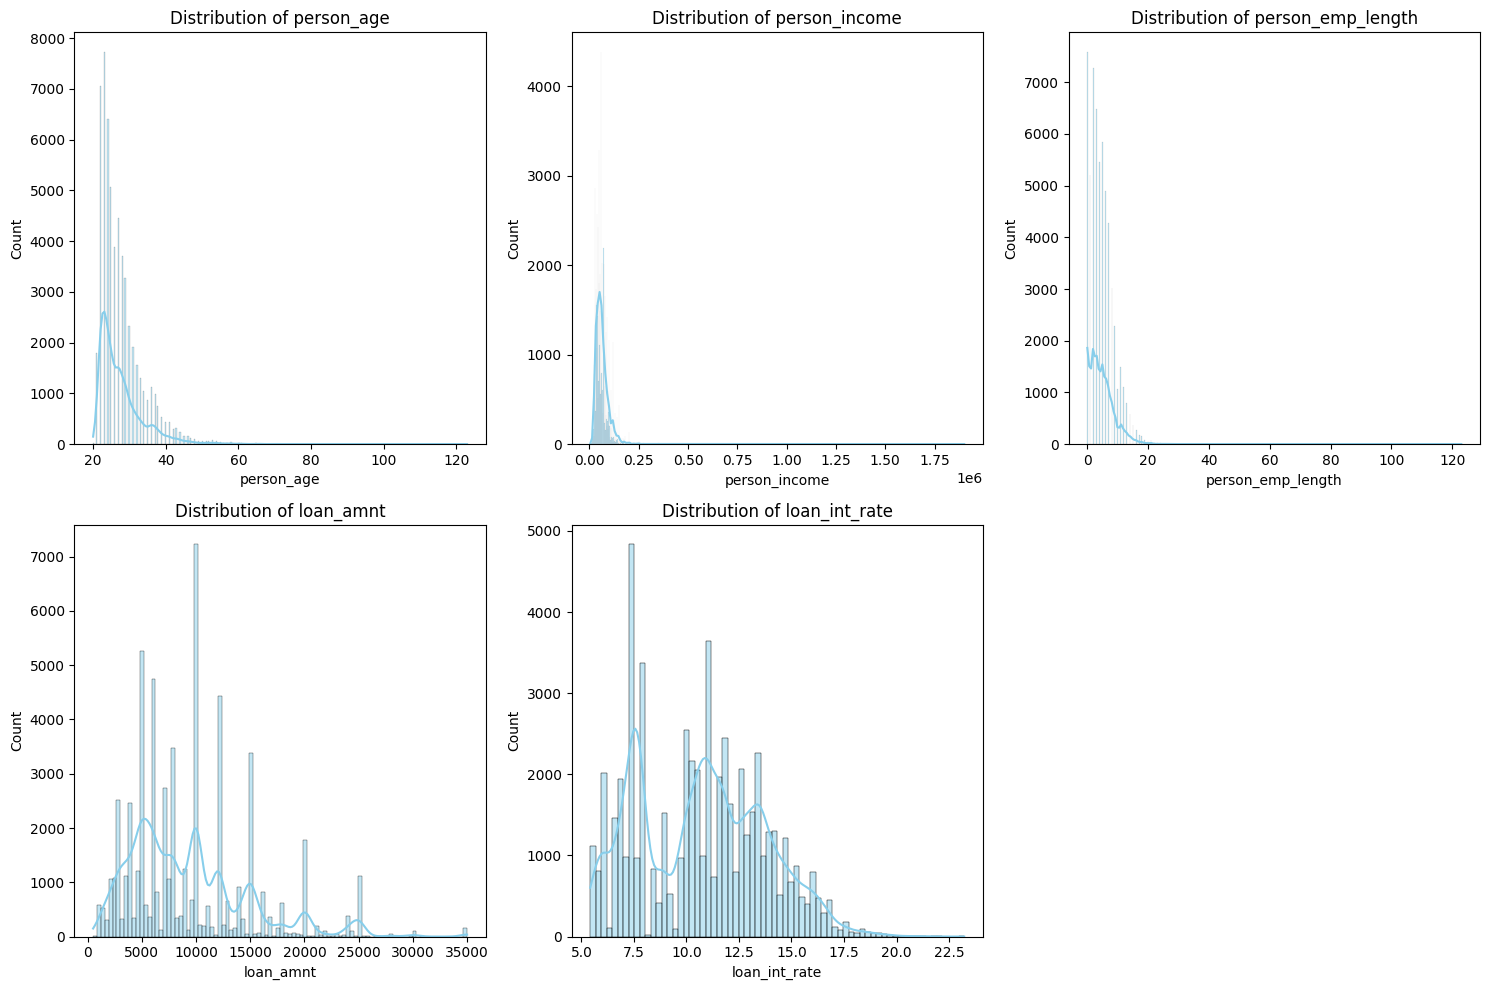

In [8]:
# Numeric Features Distribution
numeric_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


<ipython-input-9-e301d1b8f376>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-9-e301d1b8f376>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-9-e301d1b8f376>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-9-e301d1b8f376>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

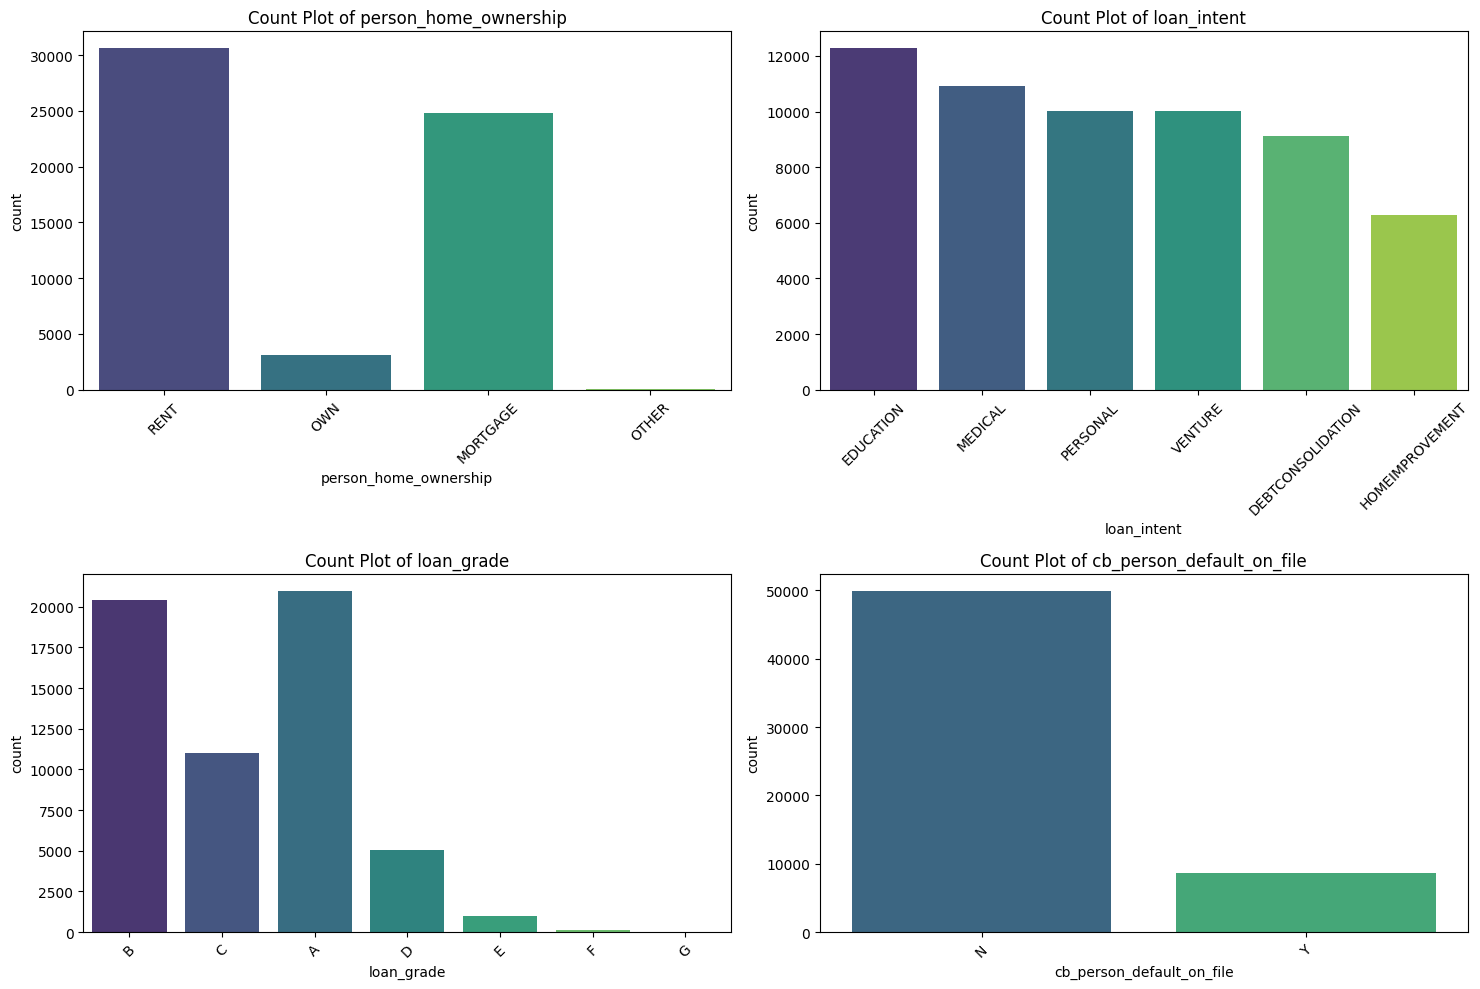

In [9]:
# Categorical Features Count Plot
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


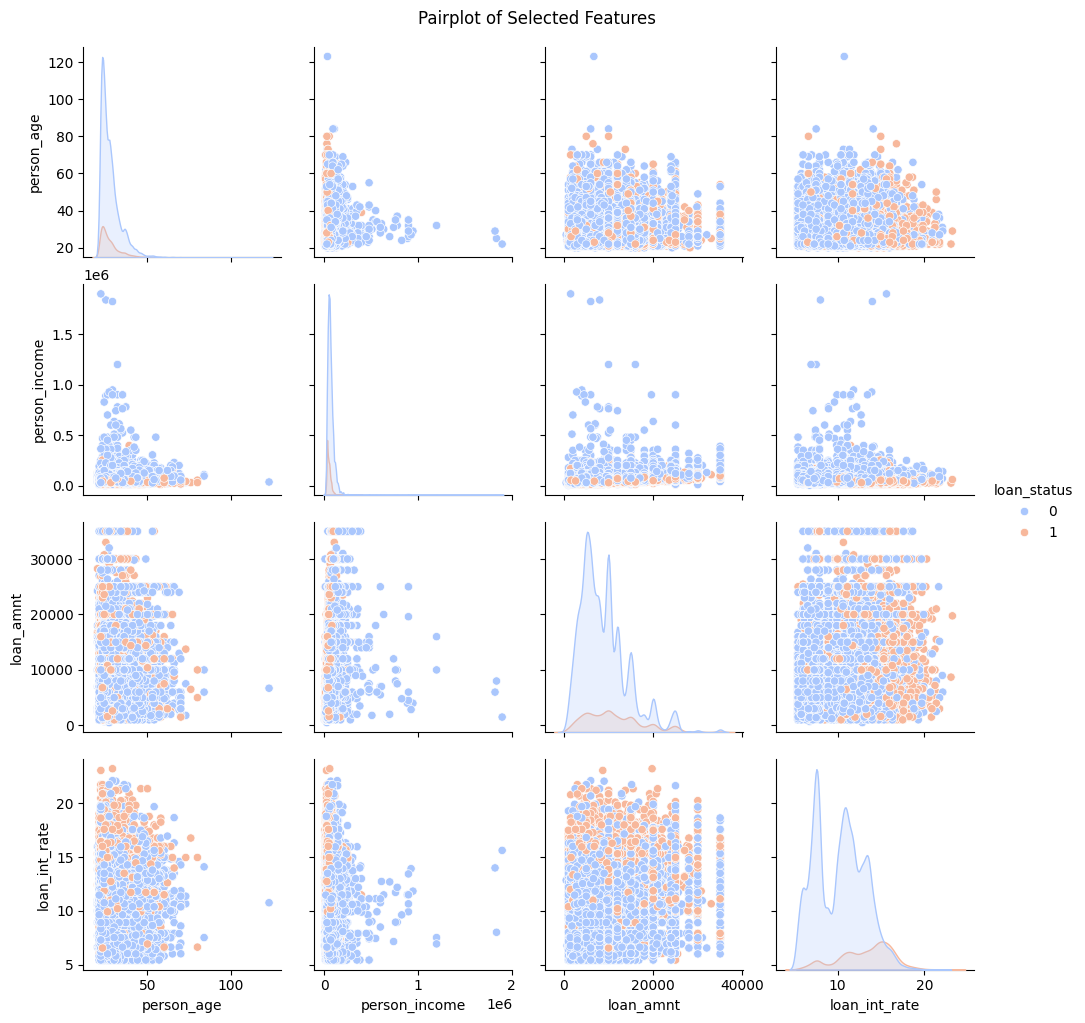

In [10]:
# Pairplot for Selected Features
sns.pairplot(df, vars=['person_age', 'person_income', 'loan_amnt', 'loan_int_rate'], hue='loan_status', palette='coolwarm')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


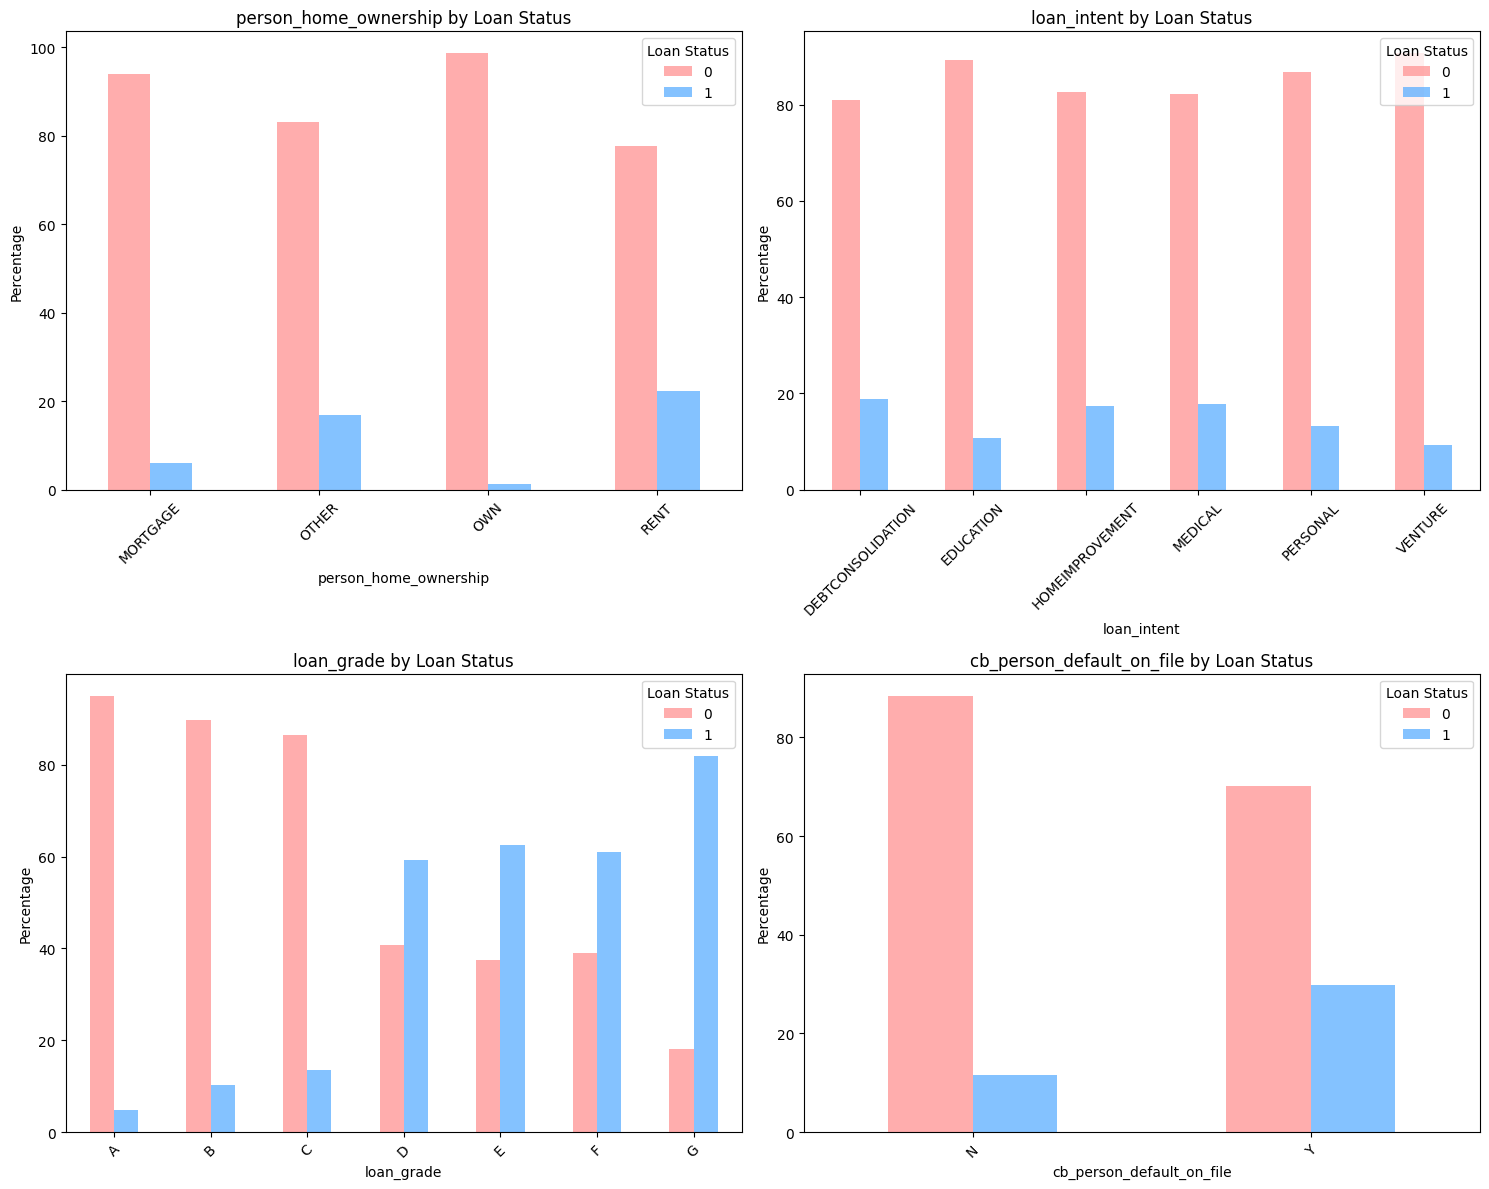

In [11]:
# Plot each categorical feature with separate bars for loan_status = 0 and loan_status = 1
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)

    # Create a normalized cross-tabulation
    status_counts = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
    status_counts.plot(kind='bar', ax=plt.gca(), color=['#ff9999', '#66b3ff'], alpha=0.8)

    plt.title(f'{col} by Loan Status')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.legend(title='Loan Status', labels=['0', '1'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [12]:
# loan_intent Summary Table
status_summary = pd.crosstab(index=df['loan_status'], columns=df['loan_intent'], normalize='columns') * 100
status_summary


loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
loan_status,,,,,,
0,81.068652,89.226632,82.627389,82.174867,86.721246,90.720208
1,18.931348,10.773368,17.372611,17.825133,13.278754,9.279792


In [13]:
# person_home_ownership Summary Table
status_summary = pd.crosstab(index=df['loan_status'], columns=df['person_home_ownership'], normalize='columns') * 100
status_summary

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,94.025943,83.146067,98.6297,77.744002
1,5.974057,16.853933,1.3703,22.255998


In [14]:
# Grouped Statistics to investigate loan grades
grouped_stats = df.groupby('loan_grade')[['loan_amnt', 'loan_int_rate']].agg(['mean', 'median', 'std']).round(2)
grouped_stats

loan_amnt                   loan_int_rate             
                mean   median      std          mean median   std
loan_grade                                                       
A            8447.10   7500.0  4730.60          7.34   7.49  1.00
B            9622.49   8000.0  5897.05         11.03  10.99  0.85
C            9009.89   8000.0  5443.46         13.51  13.49  0.81
D           10521.47   9250.0  6624.70         15.40  15.33  1.01
E           12176.31  12000.0  6559.29         16.93  16.70  1.23
F           12833.89  12000.0  7119.74         18.61  18.62  1.48
G           12559.09  11500.0  7317.00         20.33  20.16  0.98

##Now, EDA has brought great insights;
### The nature of data and participants:
- Age of the majority of participants are between 20 and 40 years. 27 is mean while 30 is 75% percentile.
- Majority of participamts were Employed for mean 4.7 years with 75% percentile as 7 years.
- Majority of participamts make income as mean 6.4k with 75% percentile as below 7.5k.
- Credit history is 4 years s mean while 75% percentile is 8 years.
- Education is the most prevalent cause of loan among participants.
- Majority of participants are renting houses while the minority own their houses.
- The category of "Other" in the feature 'person_home_ownership' may not help in the model process, as it may enclode different inputs. It will be analyzed later.
* There are outliers observed. Such as an age of 123 years, suggesting that some participants were using parent's or other older relatives profiles in the loan process. Such data is misleading and they will be later excluded before modelling.

### Relations quickly observed between features:
- association is seen between age and income. And they are both associated with loan status.
- No association is visualized between loan amount and loan status.
- Week association is visualized between int rate and loan status.
- Almost 30% of participants with history of default are getting loan accept, while almost 10% of participants with no history of default are getting their loan accepted!.
- Loan grades D,E,F and G gets the most loan acceptance in comparison to grades A,B and C. Overall, grade G is getting the most acceptance.
- Home improvement, Medical and Debt consolidations are the most reasons for loan acceptance.
- Rent was the most home ownership subcategory to get loan acceptance, while only around 1% of peaple won a house are getting their loan accepted.

## To summarize, person income is a possible predictor of loan status, alongside other features such as loan grade and age. However, a correlation is better understood in the feature engeneering process. The very first step in which is visualization of a heatmap.


In [3]:
# Converting categorical features into continous, to vis the heatmap

from sklearn.preprocessing import LabelEncoder

# List of all categorical columns
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check the transformed dataset
df.head()


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0


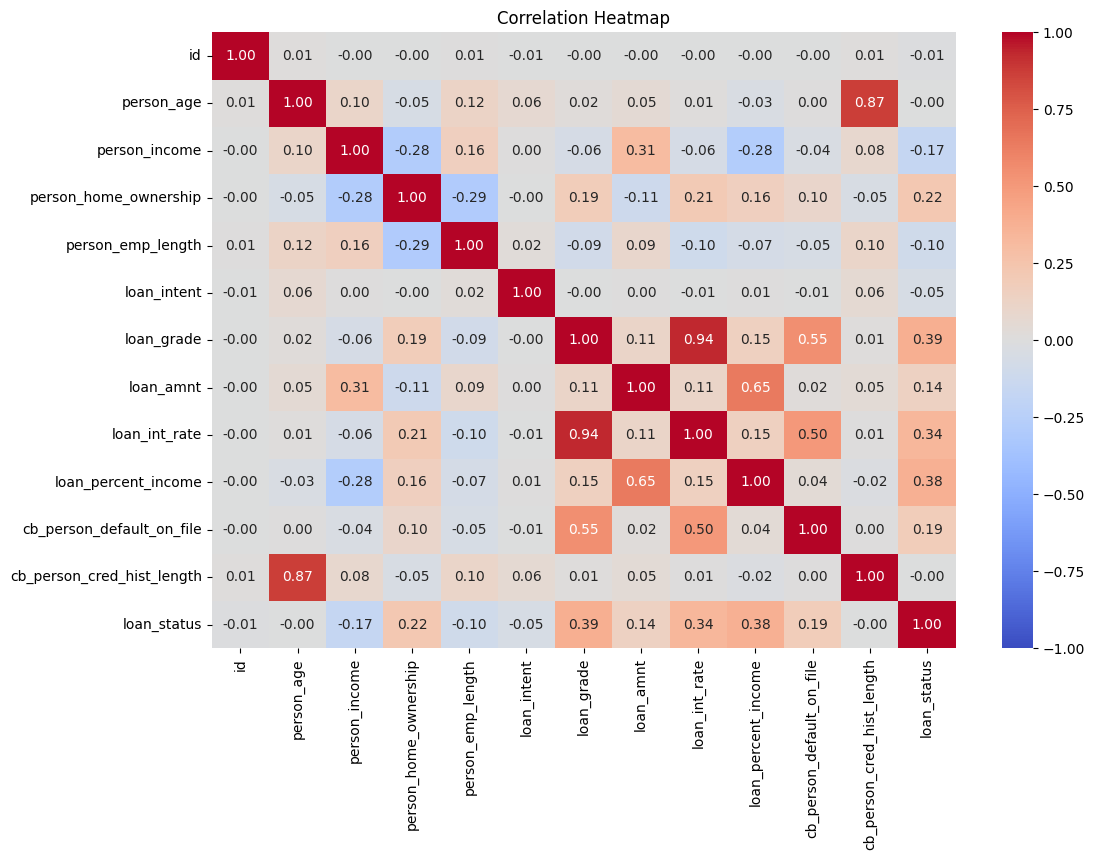

In [17]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df.var()

,0
id,2.866079e+08
person_age,3.639969e+01
person_income,1.438769e+09
person_home_ownership,2.109855e+00
person_emp_length,1.567989e+01
loan_intent,2.968370e+00
loan_grade,1.094495e+00
loan_amnt,3.095595e+07
loan_int_rate,9.209387e+00
loan_percent_income,8.407385e-03


## Modelling


###The features 'loan_percent_income', 'loan_int_rate', 'person_home_ownership' and 'loun_grade'are providing data related to housing, int rate, loan amount and income. The feature loan grade is strongly correltaed with the feature loan_int_rate, as to reduce redanduncy; it will not to be introduced into the model.
Anyway, we will observe if model results came appealing and then manipulate further if needed!

In [4]:
# Features for modeling
X = df[['loan_percent_income', 'loan_int_rate', 'person_home_ownership']]

# Target variable
y = df['loan_status']

In [5]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (46916, 3)
Testing set shape: (11729, 3)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


In [31]:
# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42)
}


In [23]:
# Dictionary to store results
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Print classification report for detailed metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)


Model: Logistic Regression
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10087
           1       0.74      0.37      0.49      1642

    accuracy                           0.89     11729
   macro avg       0.82      0.68      0.72     11729
weighted avg       0.88      0.89      0.88     11729

----------------------------------------
Model: Random Forest
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10087
           1       0.75      0.61      0.67      1642

    accuracy                           0.92     11729
   macro avg       0.84      0.79      0.81     11729
weighted avg       0.91      0.92      0.91     11729

----------------------------------------
Model: Decision Tree
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.93   

In [37]:
# Sort results by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Display results
print("Model Performance:")
for name, accuracy in sorted_results:
    print(f"{name}: {accuracy:.2f}")


Model Performance:
Random Forest: 0.92
Decision Tree: 0.91
Logistic Regression: 0.89
SVM (Linear Kernel): 0.89
SVM (RBF Kernel): 0.88


In [25]:
# Arbitrary data (similar structure to training data)
sample_data = pd.DataFrame({
    'loan_percent_income': [0.21, 0.17, 0.09],
    'loan_int_rate': [5.0, 12.5, 8.0],
    'person_home_ownership': [1, 2, 0]  # Encoded values for 'person_home_ownership'
})

# Make predictions
predictions = models["Random Forest"].predict(sample_data)
print("Predictions for the sample data:", predictions)


Predictions for the sample data: [0 0 0]


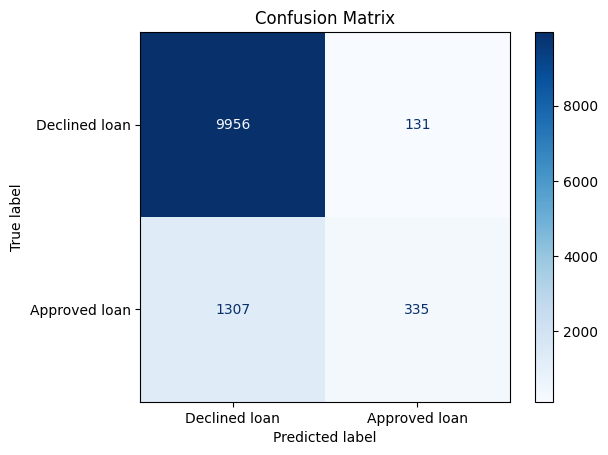

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Predict target variable using the test set
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Declined loan", "Approved loan"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()



In [41]:
# Now, we try to find best param for the random forest model
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_random.best_params_)

# Evaluate the best model
best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Accuracy: 0.9271037599113309


Accuracy: 0.93


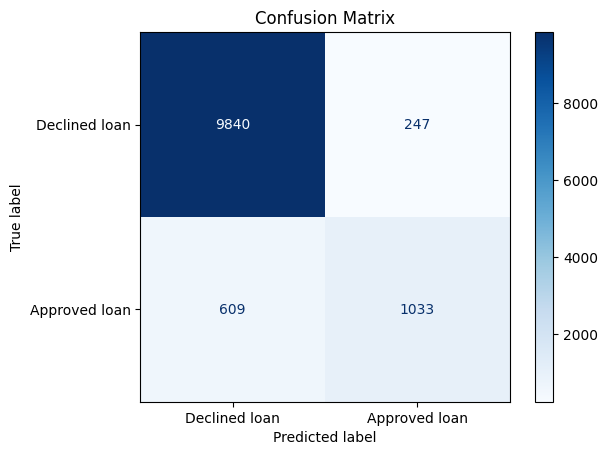

In [12]:
# Now we build a confusion Matrix from Random forest model applying the best param
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Identify model as Random Forest model
model = RandomForestClassifier(n_estimators= 200, min_samples_split= 10, min_samples_leaf= 2, max_depth =10)
# Train the model
model.fit(X_train, y_train)
# Predict target variable using the test set
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
 # Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Declined loan", "Approved loan"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## To summarize, this Model appraches an overall 93% accuracy. To be more precise; as a result of inbalanced loan status (approved loans are minority in the dataset), the predicted approved loans are of low accuracy in comparison to prediction of declined loans. Such a peoblem to be easily resolved with increase in the sample size in the model adjustment attempts following deployment.

In [13]:
# Finally, we will save the model
import pickle

# Save the model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as 'model.pkl'")


Model saved as 'model.pkl'
